In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_csv = pd.read_csv('./Downloads/homicide_reports.csv')

/Users/bobrg/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_csv.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [4]:
data_csv.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

In [5]:
data_csv['City'] = data_csv['State'] + '_' + data_csv['City']

## Baseline 1

In [6]:
x = np.unique(data_csv['Month'] + ' ' + data_csv['Year'].apply(str))
y = np.zeros(x.shape)
for i, time in enumerate(x):
    num_cases = len(data_csv[(data_csv['Month'] == time.split()[0]) & (data_csv['Year'] == int(time.split()[1]))])
    y[i] += num_cases

In [7]:
time_series = pd.DataFrame(np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1)), axis=1), columns=['Date', 'Num Cases'])
time_series['Date'] = time_series['Date'].apply(pd.to_datetime)
time_series.sort_values(by='Date', inplace=True)
time_series.set_index('Date', inplace=True, drop=True)
time_series.head(5)

,Num Cases
Date,
1980-01-01,1825
1980-02-01,1730
1980-03-01,1743
1980-04-01,1760
1980-05-01,1863


In [8]:
time_series['Num Cases orig'] = time_series['Num Cases']

In [9]:
len(time_series)

420

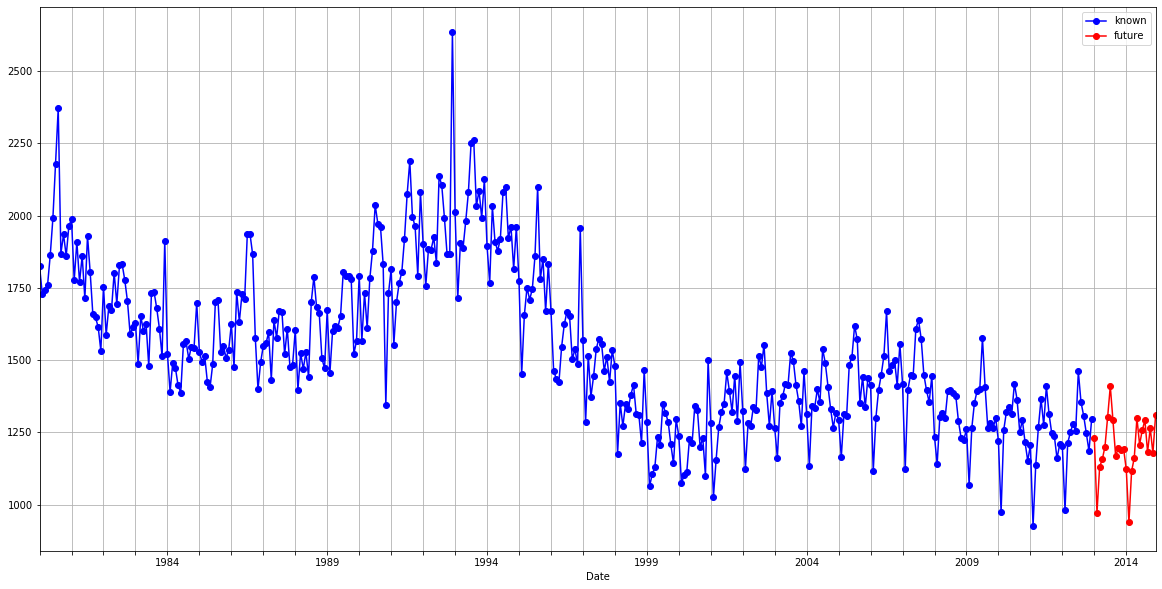

In [13]:
fig, ax = plt.subplots()

time_series[:-24]['Num Cases'].plot(ax=ax, xticks=time_series.index[::12], marker='o', c='blue', figsize=(20, 10), use_index=True, grid=True)
time_series[len(time_series) - 24:]['Num Cases'].plot(ax=ax, xticks=time_series.index[::12], marker='o', c='red', figsize=(20, 10), use_index=True, grid=True)
ax.legend(['known', 'future'])

In [14]:
print(f'Plot for year {np.unique(time_series[:12].index.year)}')

Plot for year [1980]


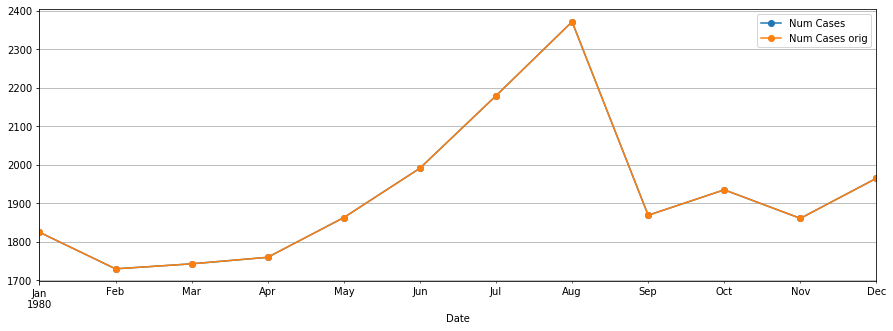

In [15]:
time_series[:12].plot(figsize=(15, 5), marker='o', use_index=True, grid=True)

In [16]:
print(f'Plot for year {np.unique(time_series[12:24].index.year)}')

Plot for year [1981]


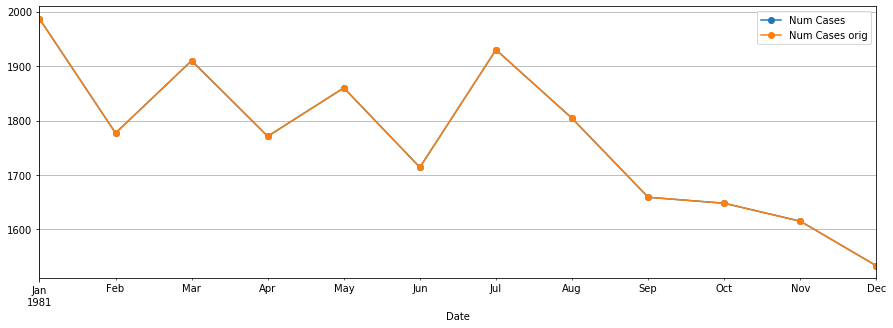

In [17]:
time_series[12:24].plot(figsize=(15, 5), marker='o', use_index=True, grid=True)

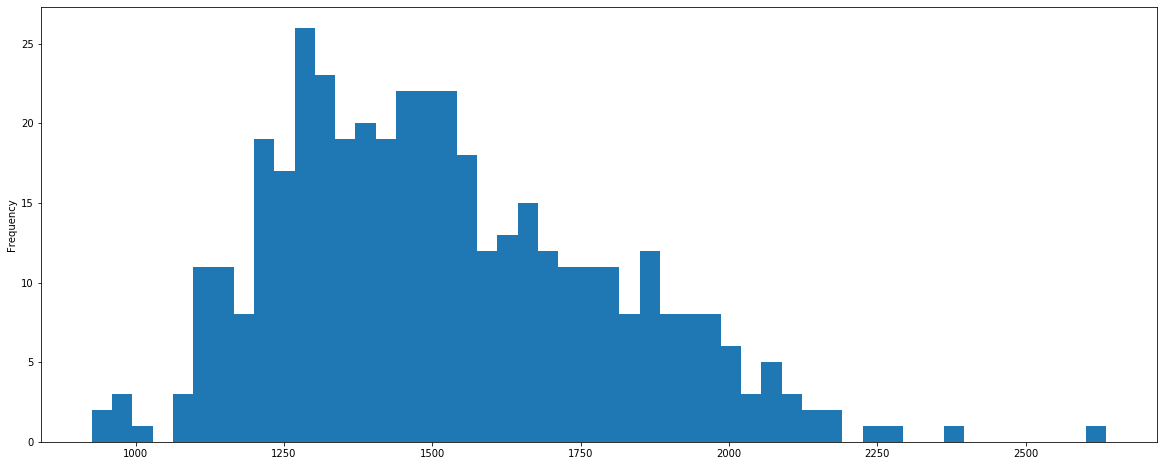

In [18]:
plt.figure(figsize=(20, 8))
time_series['Num Cases'].plot(kind = "hist", bins = 50)

### Add log data

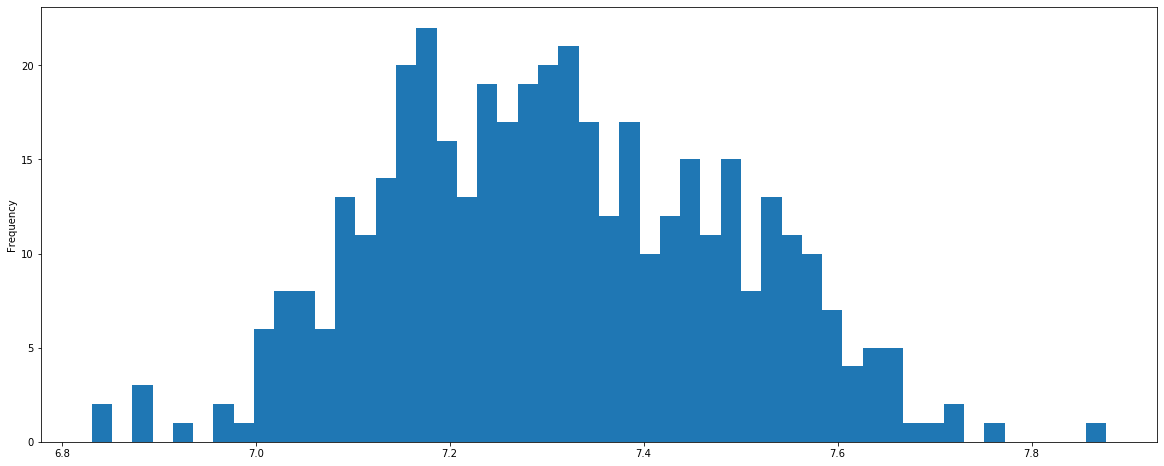

In [19]:
time_series['Num Cases'] = time_series['Num Cases'].astype(float).apply(np.log)
plt.figure(figsize=(20, 8))
time_series['Num Cases'].plot(kind = "hist", bins = 50)

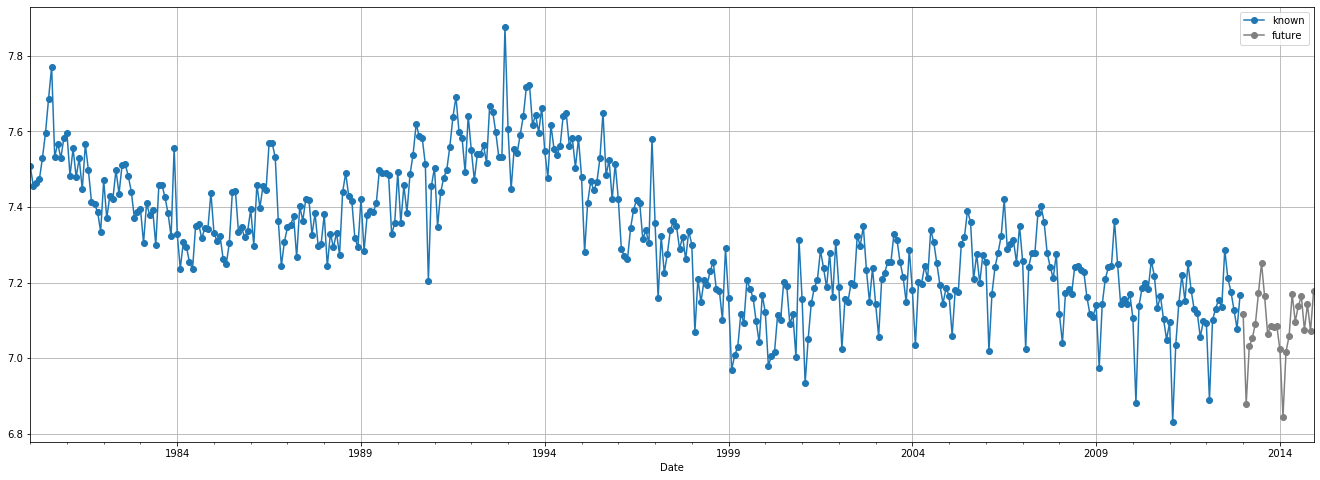

In [21]:
data = time_series[:-24]
target = time_series[len(time_series)-24:]

fig, ax = plt.subplots()
data['Num Cases'].plot(ax=ax, xticks=data.index[::12], marker='o', figsize=(23, 8), use_index=True, grid=True)
target['Num Cases'].plot(ax=ax, figsize=(23, 8), marker='o', c='grey', use_index=True, grid=True)

ax.legend(['known', 'future'])

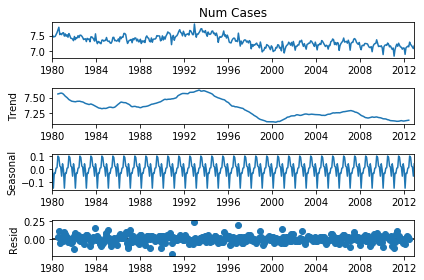

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['Num Cases'], model="additive")
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
decomposition.plot();

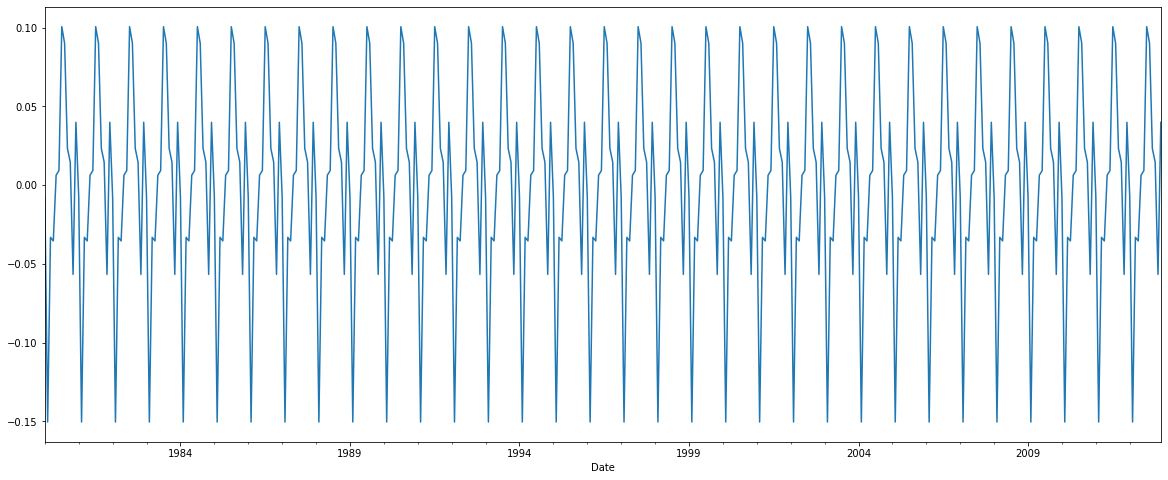

In [23]:
fig, ax = plt.subplots(figsize=(20, 8))
seasonal.plot(ax=ax)

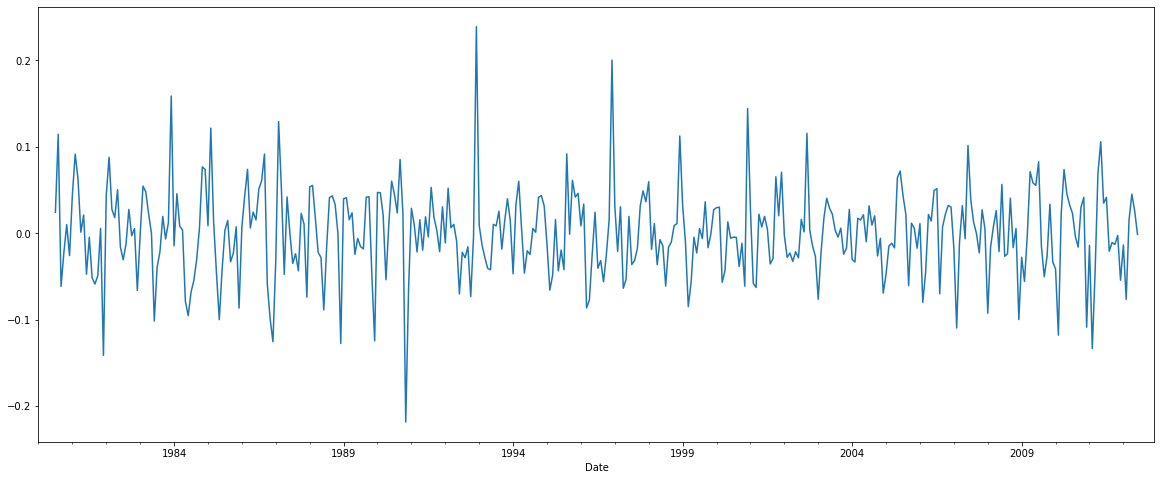

In [24]:
fig, ax = plt.subplots(figsize=(20, 8))
residual.plot(ax=ax)

### Seasonalilty ~ 12 months

## Linear Regression

In [25]:
data['days_from_start'] = (data.index - time_series.index[0]).days
data.head()

/Users/bobrg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Num Cases,Num Cases orig,days_from_start
Date,,,
1980-01-01,7.509335,1825,0
1980-02-01,7.455877,1730,31
1980-03-01,7.463363,1743,60
1980-04-01,7.473069,1760,91
1980-05-01,7.529943,1863,121


In [26]:
target['days_from_start'] = (target.index - time_series.index[0]).days
target.head()

/Users/bobrg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Num Cases,Num Cases orig,days_from_start
Date,,,
2013-01-01,7.116394,1232,12054
2013-02-01,6.879356,972,12085
2013-03-01,7.030857,1131,12113
2013-04-01,7.053586,1157,12144
2013-05-01,7.090910,1201,12174


In [27]:
from sklearn import linear_model
x = np.array(data['days_from_start']).reshape(-1, 1)
y = np.array(data['Num Cases']).reshape(-1, 1)
model = linear_model.LinearRegression().fit(x, y)

In [28]:
predictions = model.predict(np.array(target['days_from_start']).reshape(-1, 1))

In [29]:
data['Num Cases'].head()

Date
1980-01-01    7.509335
1980-02-01    7.455877
1980-03-01    7.463363
1980-04-01    7.473069
1980-05-01    7.529943
Name: Num Cases, dtype: float64

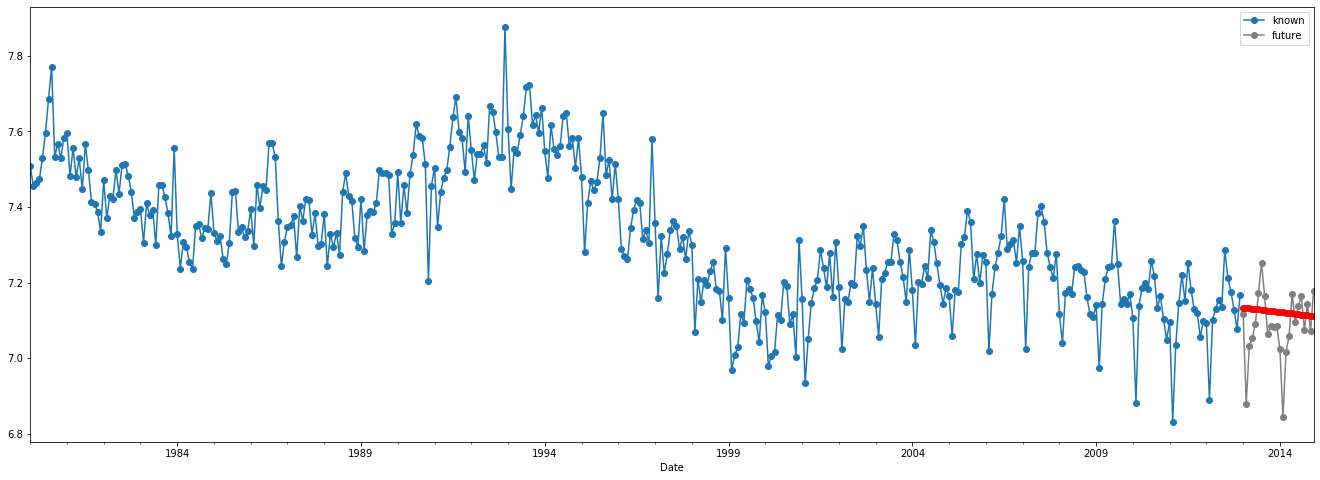

In [30]:
fig, ax = plt.subplots()
data['Num Cases'].plot(ax=ax, xticks=data.index[::12], marker='o', figsize=(23, 8), use_index=True, grid=True)
target['Num Cases'].plot(ax=ax, figsize=(23, 8), marker='o', c='grey', use_index=True, grid=True)
pred_df = pd.DataFrame(predictions, columns=['Num Cases'])
pred_df['Date'] = target.index
pred_df.set_index('Date', inplace=True, drop=True)
pred_df.plot(ax=ax, color='red', marker='o')

ax.legend(['known', 'future'])

plt.show()

In [25]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(target['Num Cases'].values, pred_df['Num Cases']))
print(f'Test RMSE: {rmse:.3f}')

Test RMSE: 0.097


In [26]:
import time
n = 10
fit_times = []
for i in range(n):
    t1 = time.time()
    model = linear_model.LinearRegression().fit(x, y)
    t2 = time.time()
    fit_times.append(t2 - t1)
print(f'Linear Regression fitting time {np.mean(fit_times)}s')

Linear Regression fitting time 0.0011103630065917968s


In [27]:
n = 10
pred_times = []
for i in range(n):
    t1 = time.time()
    predictions = model.predict(np.array(target['days_from_start']).reshape(-1, 1))
    t2 = time.time()
    pred_times.append(t2 - t1)
print(f'Linear Regression prediction time {np.mean(pred_times)}s')

Linear Regression prediction time 0.00038933753967285156s


## Train and measure RMSE for original time series

In [33]:
x = np.array(data['days_from_start']).reshape(-1, 1)
y = np.array(data['Num Cases orig']).reshape(-1, 1)
model = linear_model.LinearRegression().fit(x, y)
predictions = model.predict(np.array(target['days_from_start']).reshape(-1, 1))
rmse = np.sqrt(mean_squared_error(target['Num Cases orig'].values, pred_df['Num Cases']))
print(f'Test RMSE (not log): {rmse:.3f}')

Test RMSE (not log): 1196.160


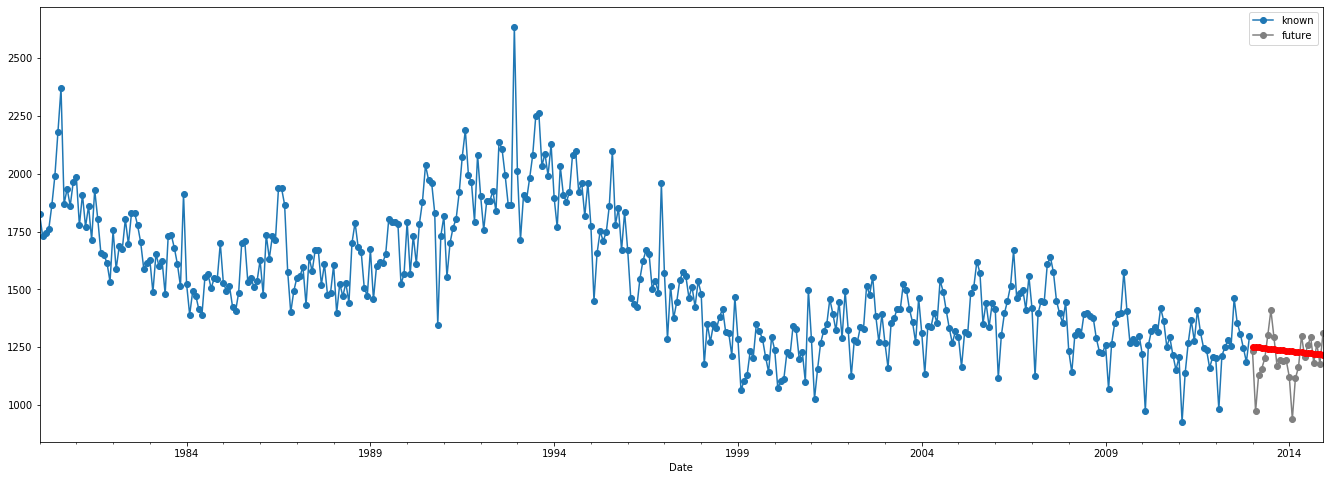

In [34]:
fig, ax = plt.subplots()
data['Num Cases orig'].plot(ax=ax, xticks=data.index[::12], marker='o', figsize=(23, 8), use_index=True, grid=True)
target['Num Cases orig'].plot(ax=ax, figsize=(23, 8), marker='o', c='grey', use_index=True, grid=True)
pred_df = pd.DataFrame(predictions, columns=['Num Cases'])
pred_df['Date'] = target.index
pred_df.set_index('Date', inplace=True, drop=True)
pred_df.plot(ax=ax, color='red', marker='o')

ax.legend(['known', 'future'])

plt.show()

## Converting to stationary

In [35]:
from statsmodels.tsa.stattools import adfuller
print("Критерий Дики-Фуллера: p=%f" % adfuller(time_series['Num Cases'])[1])

Критерий Дики-Фуллера: p=0.409276


In [36]:
time_series['Num Cases diff'] = time_series['Num Cases'] - time_series['Num Cases'].shift(1)

Критерий Дики-Фуллера: p=0.000023


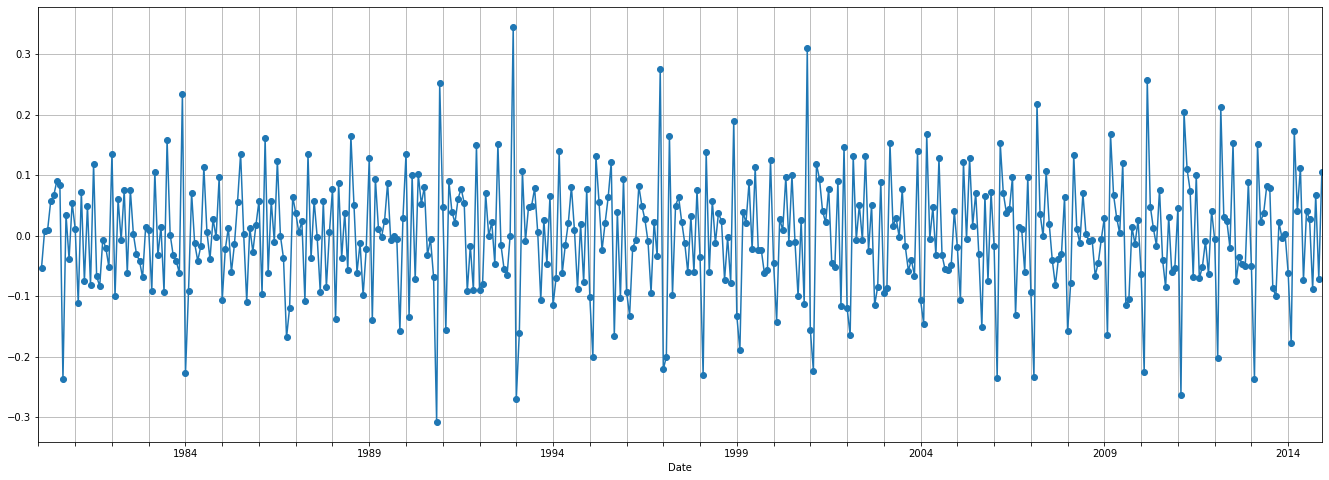

In [37]:
print("Критерий Дики-Фуллера: p=%f" % adfuller(time_series['Num Cases diff'][1:])[1])

time_series['Num Cases diff'].plot(xticks=time_series.index[::12], marker='o', figsize=(23, 8), use_index=True, grid=True)
plt.show()

## Convert to stationary original time series

In [38]:
time_series['Num Cases orig diff'] = time_series['Num Cases orig'] - time_series['Num Cases orig'].shift(1)
print("Критерий Дики-Фуллера: p=%f" % adfuller(time_series['Num Cases orig diff'][1:])[1])


Критерий Дики-Фуллера: p=0.000010


In [39]:
data = time_series[:-24]
target = time_series[len(time_series)-24:]

## Check for Autocorrelation

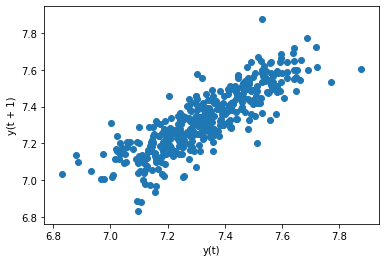

In [32]:
from pandas.plotting import lag_plot
lag_plot(data['Num Cases'], lag=1)
plt.show()

We can see a large ball of observations along a diagonal line of the plot. It clearly shows a relationship or some correlation.

Pearson correlation between steps:

In [33]:
values = data['Num Cases'].reset_index().drop('Date', axis=1).astype(int)
data_t = pd.concat([values.shift(1), values], axis=1)
data_t.columns = ['t-1', 't+1']
result = data_t.corr()
print(result)

          t-1       t+1
t-1  1.000000 -0.018041
t+1 -0.018041  1.000000


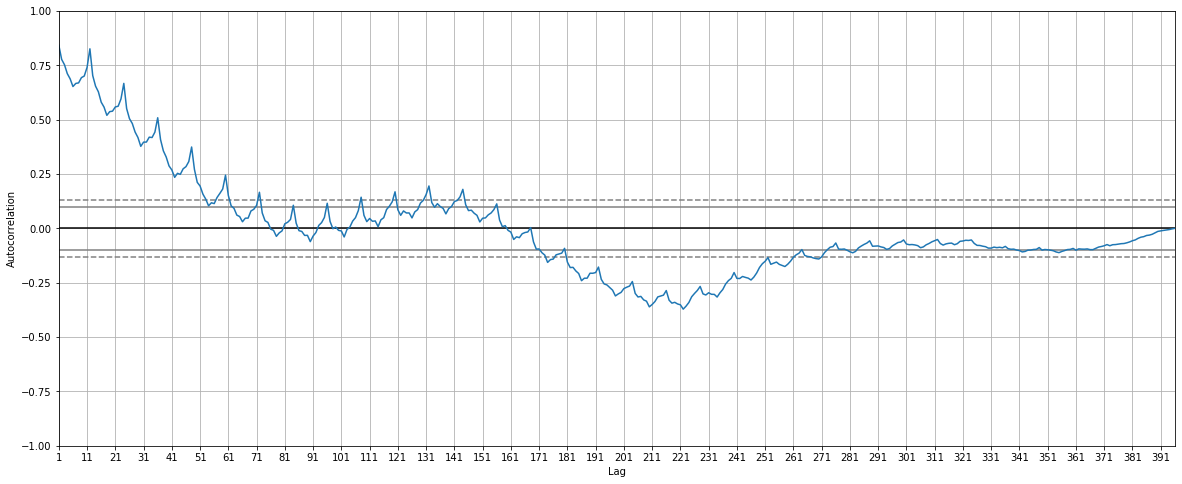

In [34]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(20, 8))
autocorrelation_plot(data['Num Cases'])
plt.xticks(np.arange(1, 400, 10))
plt.show()

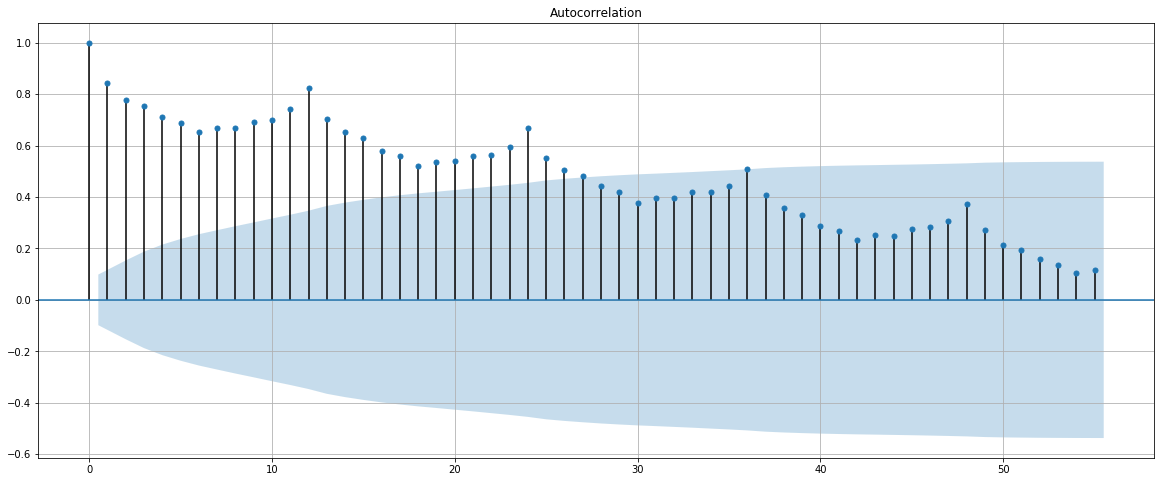

In [35]:
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(20, 8))
plot_acf(data['Num Cases'].values, lags=55, ax=ax)
plt.grid(True)
plt.show()

## **Autoregression**
An autoregression model is a linear regression model that uses lagged variables as input variables.

In [40]:
from statsmodels.tsa.ar_model import AutoReg

In [37]:
model = AutoReg(np.asarray(data['Num Cases']), lags=12)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: [ 0.15612201  0.32647522  0.03003929  0.11732171 -0.02641246  0.04203086
 -0.09160177  0.05453767 -0.0287937   0.05819687 -0.05427874  0.0554963
  0.49458468]


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [38]:
predictions = model_fit.predict(start=len(data['Num Cases']), end=len(data['Num Cases'])+len(target['Num Cases'])-1, dynamic=False)

In [50]:
for i in range(len(predictions)):
    print(f'predicted = {predictions[i]:.1f}, target = {target.values[i][0]:.1f}')

predicted = 7.1, target = 7.1
predicted = 7.0, target = 6.9
predicted = 7.1, target = 7.0
predicted = 7.1, target = 7.1
predicted = 7.1, target = 7.1
predicted = 7.1, target = 7.2
predicted = 7.2, target = 7.3
predicted = 7.2, target = 7.2
predicted = 7.2, target = 7.1
predicted = 7.1, target = 7.1
predicted = 7.1, target = 7.1
predicted = 7.1, target = 7.1
predicted = 7.1, target = 7.0
predicted = 7.0, target = 6.8
predicted = 7.1, target = 7.0
predicted = 7.1, target = 7.1
predicted = 7.1, target = 7.2
predicted = 7.1, target = 7.1
predicted = 7.2, target = 7.1
predicted = 7.2, target = 7.2
predicted = 7.2, target = 7.1
predicted = 7.1, target = 7.1
predicted = 7.1, target = 7.1
predicted = 7.1, target = 7.2


In [51]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(target['Num Cases'].values, predictions))
print(f'Test RMSE: {rmse:.3f}')

Test RMSE: 0.069


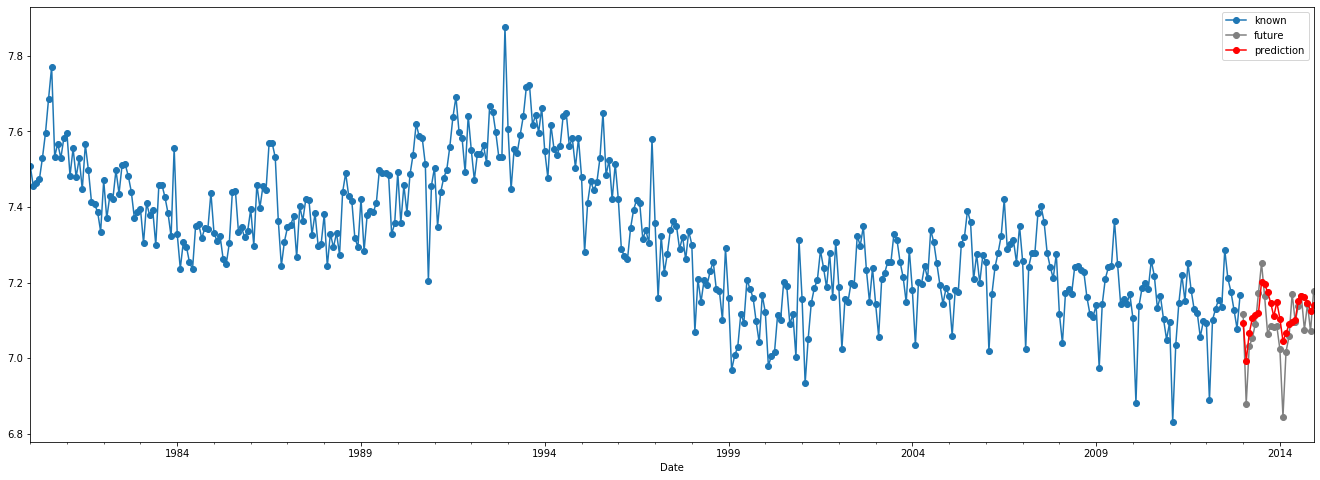

In [52]:
# plot results
fig, ax = plt.subplots()
data['Num Cases'].plot(ax=ax, xticks=data['Num Cases'].index[::12], marker='o', figsize=(23, 8), use_index=True, grid=True)
target['Num Cases'].plot(ax=ax, figsize=(23, 8), marker='o', c='grey', use_index=True, grid=True)
pred_df = pd.DataFrame(predictions, columns=['Num Cases'])
pred_df['Date'] = target.index
pred_df.set_index('Date', inplace=True, drop=True)
pred_df.plot(ax=ax, color='red', marker='o')

ax.legend(['known', 'future', 'prediction'])

plt.show()

In [39]:
n = 10
fit_times = []
for i in range(n):
    t1 = time.time()
    model = AutoReg(np.asarray(data['Num Cases']), lags=12)
    model_fit = model.fit()
    t2 = time.time()
    fit_times.append(t2 - t1)
print(f'AutoRegression fitting time {np.mean(fit_times)}s')

AutoRegression fitting time 0.005014824867248535s


In [40]:
n = 10
pred_times = []
for i in range(n):
    t1 = time.time()
    predictions = model_fit.predict(start=len(data['Num Cases']), end=len(data['Num Cases'])+len(target['Num Cases'])-1, dynamic=False) 
    t2 = time.time()
    pred_times.append(t2 - t1)
print(f'AutoRegression prediction time {np.mean(pred_times)}s')

AutoRegression prediction time 0.0015124797821044922s


### Measure RMSE for original time series

In [41]:
model = AutoReg(np.asarray(data['Num Cases orig']), lags=12)
model_fit = model.fit()
predictions = model_fit.predict(start=len(data['Num Cases orig']), end=len(data['Num Cases orig'])+len(target['Num Cases orig'])-1, dynamic=False)
rmse = np.sqrt(mean_squared_error(target['Num Cases orig'].values, predictions))
print(f'Test RMSE: {rmse:.3f}')

Test RMSE: 83.963


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


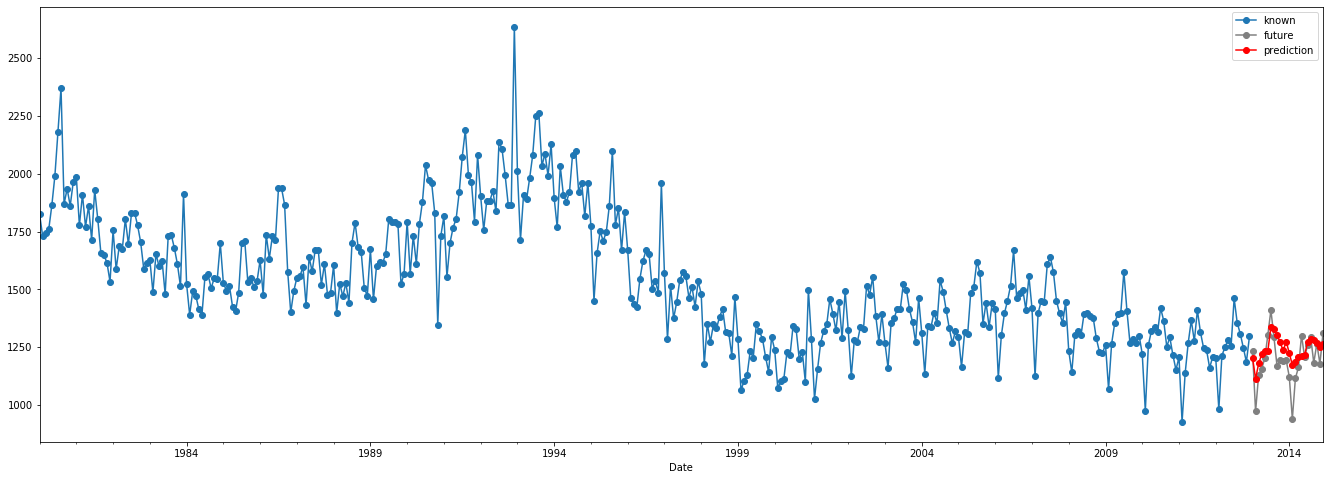

In [42]:
# plot results
fig, ax = plt.subplots()
data['Num Cases orig'].plot(ax=ax, xticks=data['Num Cases'].index[::12], marker='o', figsize=(23, 8), use_index=True, grid=True)
target['Num Cases orig'].plot(ax=ax, figsize=(23, 8), marker='o', c='grey', use_index=True, grid=True)
pred_df = pd.DataFrame(predictions, columns=['Num Cases'])
pred_df['Date'] = target.index
pred_df.set_index('Date', inplace=True, drop=True)
pred_df.plot(ax=ax, color='red', marker='o')

ax.legend(['known', 'future', 'prediction'])

plt.show()

## ARIMA

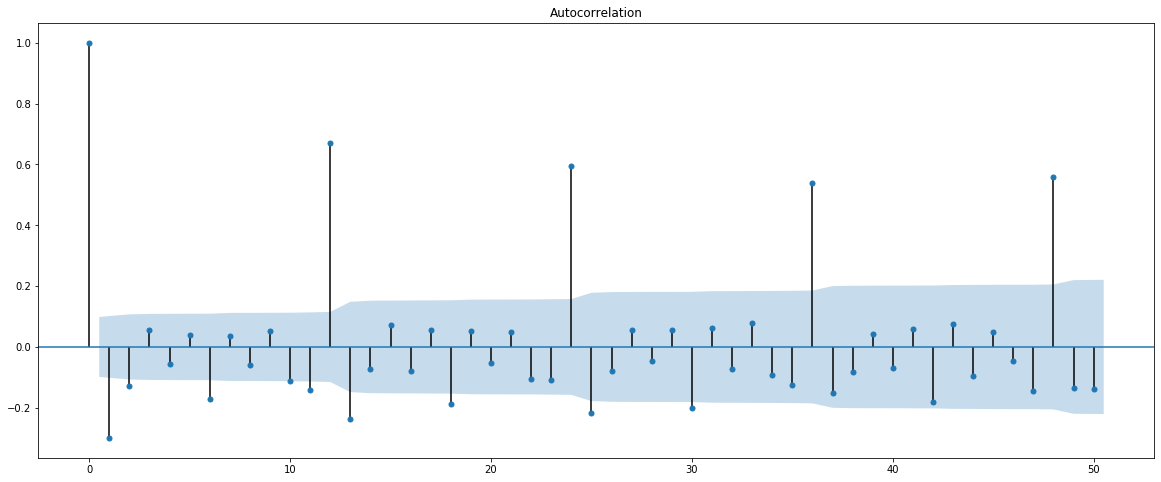

In [44]:
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(20, 8))
plot_acf(data['Num Cases diff'][1:], lags=50, ax=ax)
plt.show()

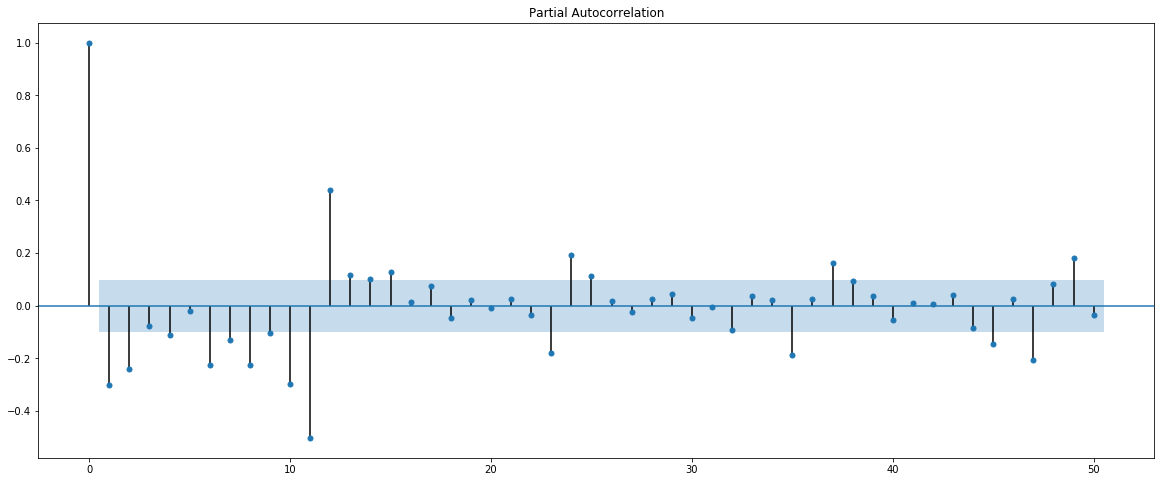

In [77]:
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(20, 8))
plot_pacf(data['Num Cases diff'][1:], lags=50, ax=ax)
plt.show()

In [48]:
from statsmodels.tsa.arima_model import ARIMA

In [51]:
history = np.array(data['Num Cases diff'][1:]).copy()
predictions = []
for t in range(len(target)):
    model = ARIMA(history, order=(12,0,11))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()[0]
    predictions.append(output[0])
    history = np.append(history, target.iloc[t]['Num Cases diff'])
    print('predicted=%f, expected=%f' % (output[0], target.iloc[t]['Num Cases diff']))

/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=-0.034075, expected=-0.050644


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=-0.191561, expected=-0.237038


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.228440, expected=0.151502


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.077270, expected=0.022728


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.038693, expected=0.037324


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.010343, expected=0.081515


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.048410, expected=0.078920


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=-0.065454, expected=-0.087398


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=-0.072422, expected=-0.100043


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.052877, expected=0.021998


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=-0.080115, expected=-0.004193


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.033362, expected=0.002518


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=-0.049178, expected=-0.061358


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=-0.164944, expected=-0.178053


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.178934, expected=0.172691


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.074019, expected=0.040392


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.019470, expected=0.112222


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=-0.011244, expected=-0.073398


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.114721, expected=0.040557


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=-0.043933, expected=0.026668


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=-0.080886, expected=-0.088983


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.030857, expected=0.067864


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=-0.108276, expected=-0.071254
predicted=0.002708, expected=0.105445


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


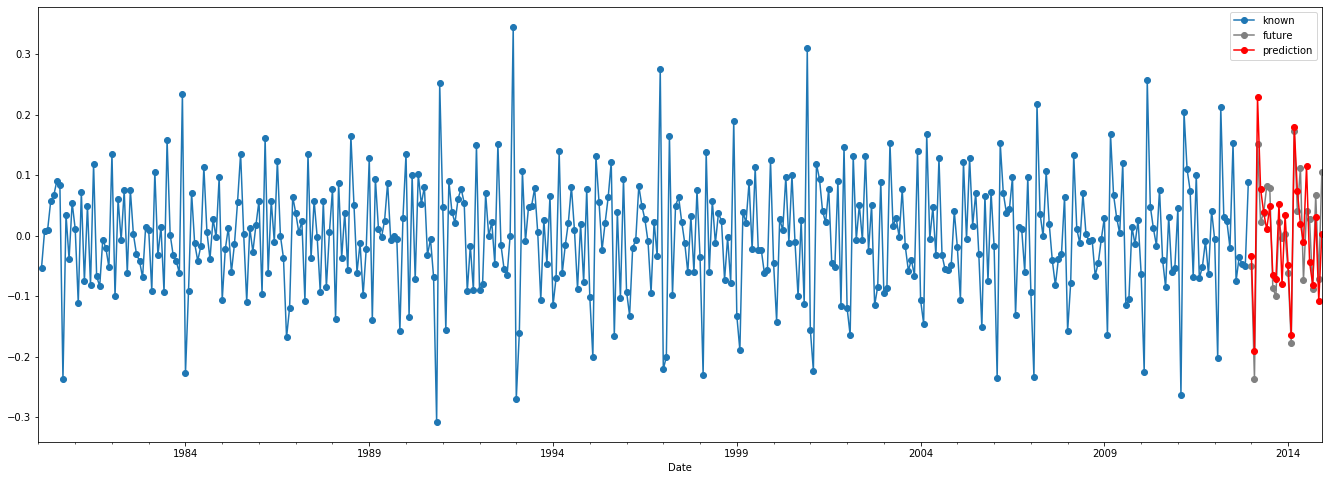

In [52]:
###### plot results
fig, ax = plt.subplots()
data['Num Cases diff'].plot(ax=ax, xticks=data.index[::12], marker='o', figsize=(23, 8), use_index=True, grid=True)
target['Num Cases diff'].plot(ax=ax, figsize=(23, 8), marker='o', c='grey', use_index=True, grid=True)
pred_df = pd.DataFrame(predictions, columns=['Num Cases'])
pred_df['Date'] = target.index
pred_df.set_index('Date', inplace=True, drop=True)
pred_df.plot(ax=ax, color='red', marker='o')

ax.legend(['known', 'future', 'prediction'])

plt.show()

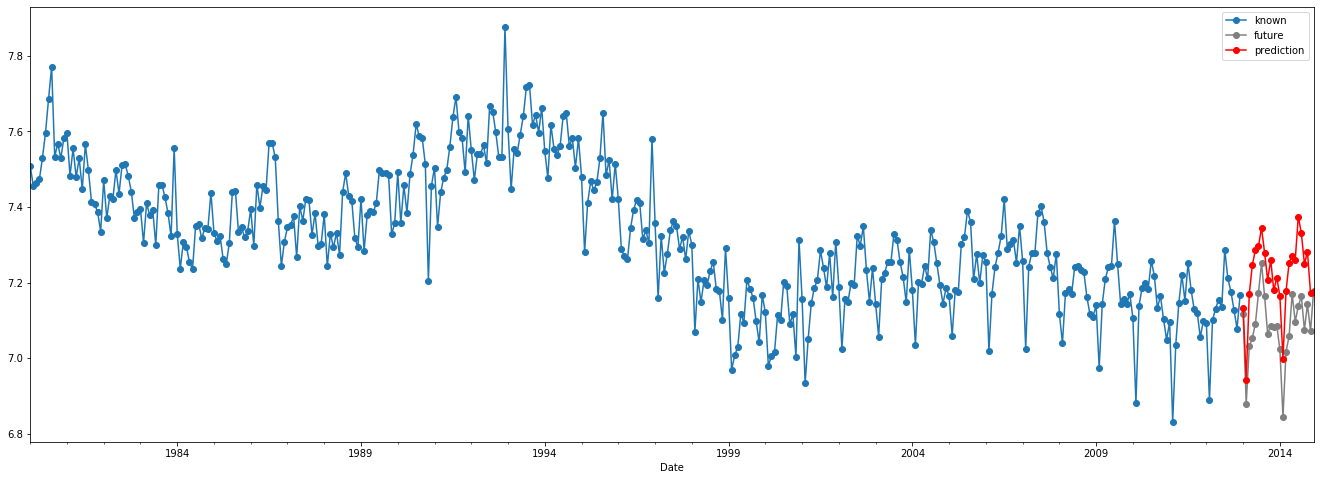

In [53]:
fig, ax = plt.subplots()
data['Num Cases'].plot(ax=ax, xticks=data.index[::12], marker='o', figsize=(23, 8), use_index=True, grid=True)
target['Num Cases'].plot(ax=ax, figsize=(23, 8), marker='o', c='grey', use_index=True, grid=True)
pred_num_cases = data['Num Cases diff'].append(pred_df['Num Cases']).cumsum() + data['Num Cases'][0]
pred_num_cases[-24:].plot(ax=ax, color='red', marker='o')

ax.legend(['known', 'future', 'prediction'])

plt.show()

In [54]:
tg = target['Num Cases'].values
print(f'ARIMA RMSE {np.sqrt(mean_squared_error(tg, pred_num_cases[-24:]))}')

ARIMA RMSE 0.14434341473167941


### Let's try other parameters

In [65]:
history = np.array(data['Num Cases diff'][1:]).copy()
predictions = []
for t in range(len(target)):
    model = ARIMA(history, order=(12,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()[0]
    predictions.append(output[0])
    history = np.append(history, target.iloc[t]['Num Cases diff'])
    print('predicted=%f, expected=%f' % (output[0], target.iloc[t]['Num Cases diff']))

/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=-0.062527, expected=-0.050644
predicted=-0.136074, expected=-0.237038
predicted=0.199787, expected=0.151502
predicted=0.070737, expected=0.022728
predicted=0.035759, expected=0.037324
predicted=0.004040, expected=0.081515
predicted=0.055149, expected=0.078920
predicted=-0.055757, expected=-0.087398
predicted=-0.016933, expected=-0.100043
predicted=0.019045, expected=0.021998
predicted=-0.033665, expected=-0.004193
predicted=0.040183, expected=0.002518
predicted=-0.038189, expected=-0.061358
predicted=-0.139616, expected=-0.178053
predicted=0.134805, expected=0.172691
predicted=0.016636, expected=0.040392
predicted=0.011980, expected=0.112222
predicted=0.012275, expected=-0.073398
predicted=0.083443, expected=0.040557
predicted=-0.022817, expected=0.026668
predicted=-0.102738, expected=-0.088983
predicted=0.010682, expected=0.067864
predicted=-0.049327, expected=-0.071254
predicted=0.002326, expected=0.105445


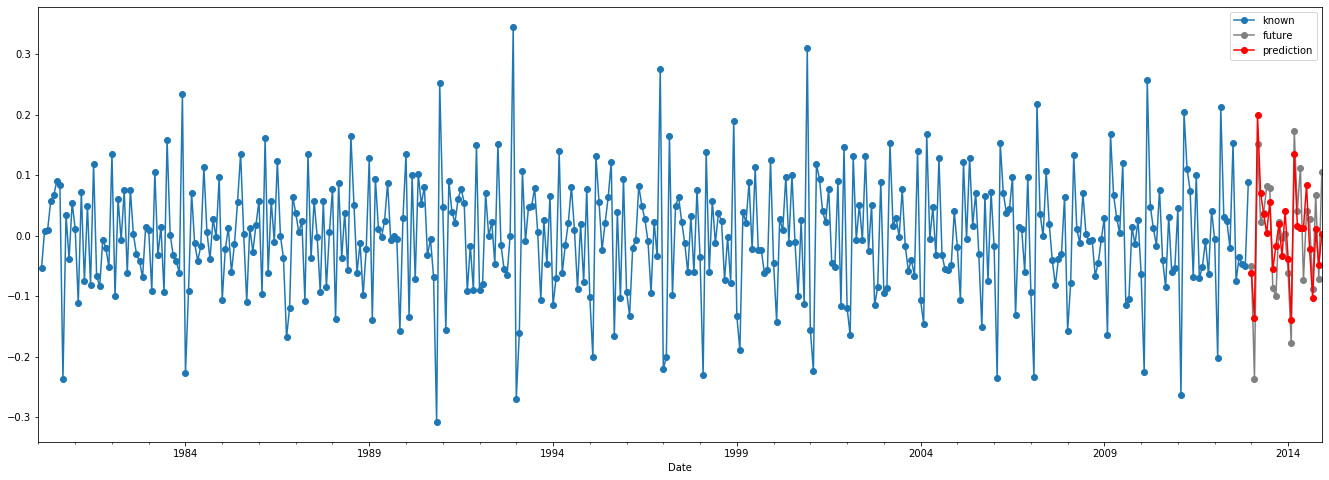

In [68]:
###### plot results
fig, ax = plt.subplots()
data['Num Cases diff'].plot(ax=ax, xticks=data.index[::12], marker='o', figsize=(23, 8), use_index=True, grid=True)
target['Num Cases diff'].plot(ax=ax, figsize=(23, 8), marker='o', c='grey', use_index=True, grid=True)
pred_df = pd.DataFrame(predictions, columns=['Num Cases'])
pred_df['Date'] = target.index
pred_df.set_index('Date', inplace=True, drop=True)
pred_df.plot(ax=ax, color='red', marker='o')

ax.legend(['known', 'future', 'prediction'])

plt.show()

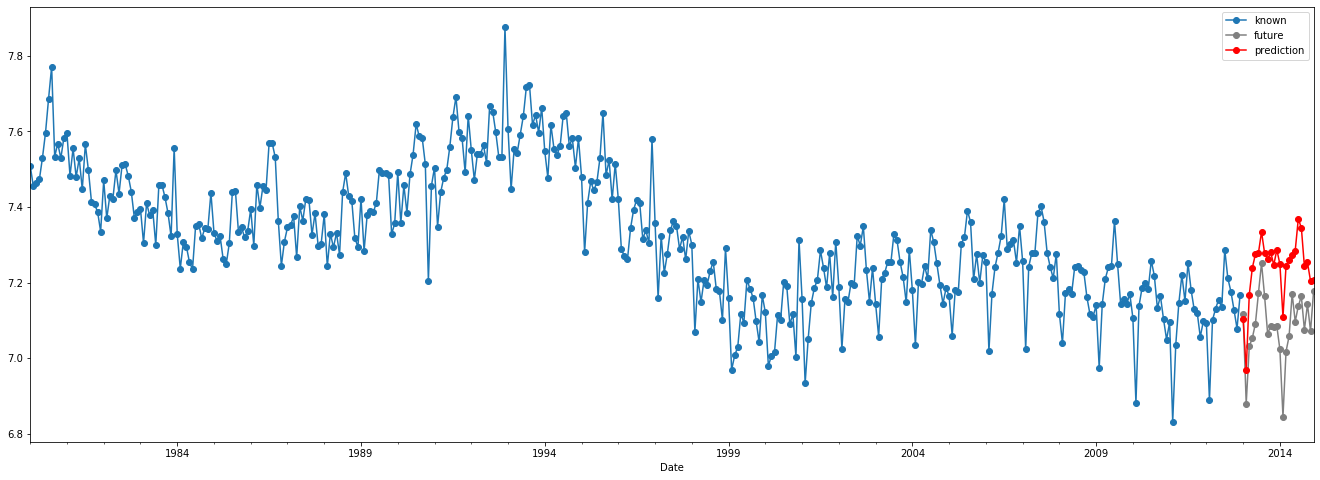

In [69]:
fig, ax = plt.subplots()
data['Num Cases'].plot(ax=ax, xticks=data.index[::12], marker='o', figsize=(23, 8), use_index=True, grid=True)
target['Num Cases'].plot(ax=ax, figsize=(23, 8), marker='o', c='grey', use_index=True, grid=True)
pred_num_cases = data['Num Cases diff'].append(pred_df['Num Cases']).cumsum() + data['Num Cases'][0]
pred_num_cases[-24:].plot(ax=ax, color='red', marker='o')

ax.legend(['known', 'future', 'prediction'])

plt.show()

In [70]:
tg = target['Num Cases'].values
print(f'ARIMA RMSE {np.sqrt(mean_squared_error(tg, pred_num_cases[-24:]))}')

ARIMA RMSE 0.16767271532614694


### Time measurement for best parameters

In [58]:
n = 1
fit_time = []
pred_time = []
for i in range(n):
    print(f'lap {i}')
    history = np.array(data['Num Cases diff'][1:]).copy()
    predictions = []
    fit_time_per_target = []
    pred_time_per_target = []
    for t in range(len(target)):
        fit_t1 = time.time()
        model = ARIMA(history, order=(12,0,11))
        model_fit = model.fit(disp=0)
        fit_t2 = time.time()
        fit_time_per_target.append(fit_t2 - fit_t1)
        pred_t1 = time.time()
        output = model_fit.forecast()[0]
        predictions.append(output[0])
        pred_t2 = time.time()
        pred_time.append(pred_t2-pred_t1)
        history = np.append(history, target.iloc[t]['Num Cases diff'])
    fit_time.append(np.mean(fit_time_per_target))
    pred_time.append(np.mean(pred_time_per_target))

lap 0


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params 

In [69]:
print(f'ARIMA fitting time {np.mean(fit_time)}s')
print(f'ARIMA prediction time {np.mean(pred_time)}s')

ARIMA fitting time 98.07046405474345s
ARIMA prediction time 0.007497082153956096s


### Measure RMSE for original time series

In [122]:
from statsmodels.tsa.arima_model import ARIMA
history = np.array(data['Num Cases orig diff'][1:].astype(float)).copy()
predictions = []
for t in range(len(target)):
    model = ARIMA(history, order=(12,0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()[0]
    predictions.append(output[0])
    history = np.append(history, target.iloc[t]['Num Cases orig diff'])
    
tg = target['Num Cases orig'].values
pred_df = pd.DataFrame(predictions, columns=['Num Cases orig'])
pred_df['Date'] = target.index
pred_df.set_index('Date', inplace=True, drop=True)
pred_num_cases = data['Num Cases orig diff'].append(pred_df['Num Cases orig']).cumsum() + data['Num Cases orig'][0]
print(f'ARIMA RMSE {np.sqrt(mean_squared_error(tg, pred_num_cases[-24:]))}')

ARIMA RMSE 184.55627007487044


## SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data['Num Cases'][1:], order=(11,1,11), seasonal_order=(12,1,11,12)).fit()
res = model.resid
predictions_data = model.predict(start=data.index[-1], end=target.index[-1])

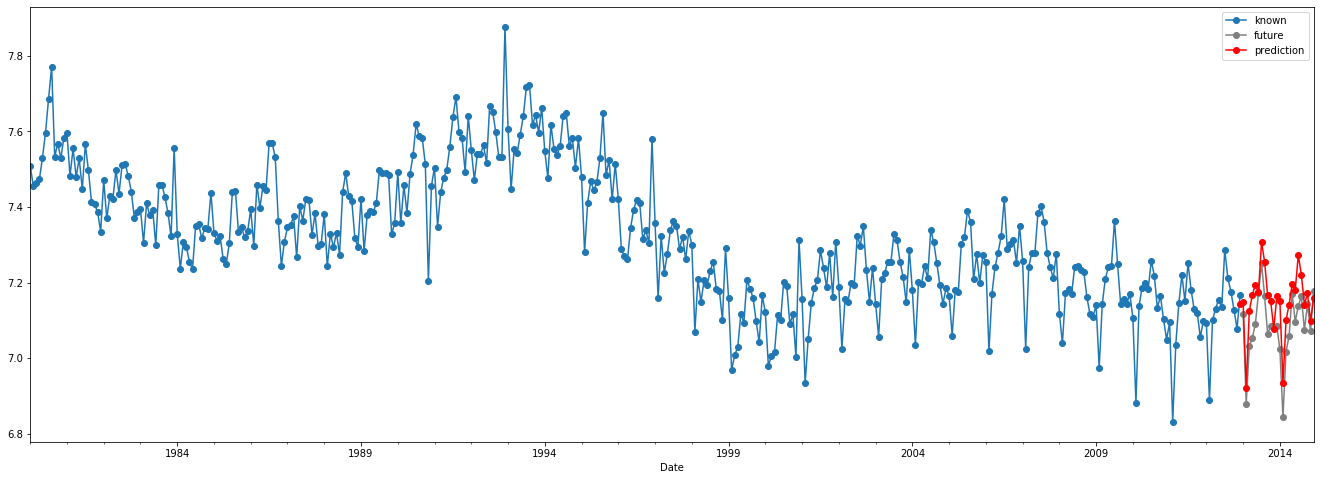

In [43]:
fig, ax = plt.subplots()
data['Num Cases'].plot(ax=ax, xticks=data.index[::12], marker='o', figsize=(23, 8), use_index=True, grid=True)
target['Num Cases'].plot(ax=ax, figsize=(23, 8), marker='o', c='grey', use_index=True, grid=True)
predictions_data.plot(ax=ax, color='red', marker='o')
# pred_num_cases = data['Num Cases diff'].append(predictions_data).cumsum() + data['Num Cases'][0]
# pred_num_cases[-24:].plot(ax=ax, color='red', marker='o')

ax.legend(['known', 'future', 'prediction'])

plt.show()

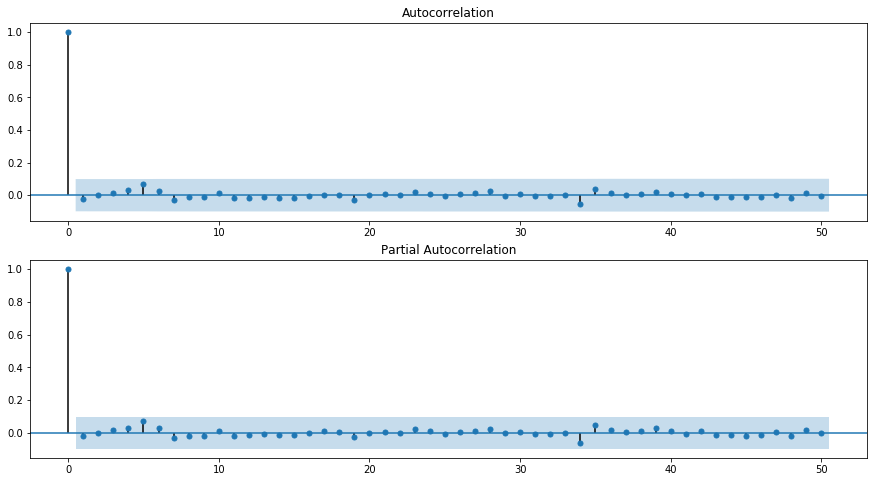

In [44]:
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = plot_acf(res[1:], lags=50, ax=ax[0])
fig = plot_pacf(res[1:], lags=50, ax=ax[1])
plt.show()

In [55]:
tg = target['Num Cases'].values
print(f'SARIMA RMSE {np.sqrt(mean_squared_error(tg, predictions_data.values[1:]))}')

SARIMA RMSE 0.07664000639948931


In [85]:
n = 10
fit_times = []
for i in range(n):
    t1 = time.time()
    model = SARIMAX(data['Num Cases'][1:], order=(11,1,11), seasonal_order=(12,1,11,12)).fit()
    t2 = time.time()
    fit_times.append(t2 - t1)
print(f'SARIMA fitting time {np.mean(fit_times)}s')

/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA fitting time 562.1241450309753s


In [90]:
n = 10
pred_times = []
for i in range(n):
    t1 = time.time()
    predictions_data = model.predict(start=data.index[-1], end=target.index[-1])    
    t2 = time.time()
    pred_times.append(t2 - t1)
print(f'SARIMA prediction time {np.mean(pred_times)}s')


SARIMA prediction time 0.056043362617492674s


### Measure RMSE for original time series

In [99]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data['Num Cases orig'].astype(float), order=(11,1,11), seasonal_order=(12,1,11,12)).fit()
predictions_data = model.predict(start=data.index[-1], end=target.index[-1])

tg = target['Num Cases orig'].values
print(f'SARIMA RMSE {np.sqrt(mean_squared_error(tg, predictions_data.values[1:]))}')

/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA RMSE 95.63749311200218


## ARIMAX

In [100]:
#month one hot encoding
time_series['month'] = time_series.index.month
month_dummies = pd.get_dummies(time_series['month'])
month_dummies.columns = ['month-'+ str(m) for m in range(1,13)]
time_series = pd.concat([time_series, month_dummies], axis=1, join_axes=[time_series.index]).drop(['month'], axis=1)
#dayofweek one hot encoding
time_series['dayofweek'] = time_series.index.weekday
week_dummies = pd.get_dummies(time_series['dayofweek'])
week_dummies.columns = ['dayofweek-'+ str(w) for w in range(0,7)]
time_series = pd.concat([time_series, week_dummies], axis=1, join_axes=[time_series.index]).drop(['dayofweek'], axis=1)
#Satday,Sunday
time_series['Weekend'] = (time_series.index.dayofweek>4).astype(int)

/Users/bobrg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  """
/Users/bobrg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  # Remove the CWD from sys.path while we load stuff.


In [101]:
time_series.head(5)

,Num Cases,Num Cases orig,Num Cases diff,Num Cases orig diff,month-1,month-2,month-3,month-4,month-5,month-6,...,month-11,month-12,dayofweek-0,dayofweek-1,dayofweek-2,dayofweek-3,dayofweek-4,dayofweek-5,dayofweek-6,Weekend
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-01,7.509335,1825,NaN,NaN,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1980-02-01,7.455877,1730,-0.053459,-95,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1980-03-01,7.463363,1743,0.007486,13,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1980-04-01,7.473069,1760,0.009706,17,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1980-05-01,7.529943,1863,0.056874,103,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [102]:
data = time_series[:-24]
target = time_series[len(time_series)-24:]

In [108]:
exog_train = data.drop(['Num Cases', 'Num Cases diff', 'Num Cases orig', 'Num Cases orig diff'], axis=1)

In [109]:
exog_test = target.drop(['Num Cases', 'Num Cases diff', 'Num Cases orig', 'Num Cases orig diff'], axis=1)

In [110]:
arimax = SARIMAX(data['Num Cases'].astype(float), order=(1,1,12), seasonal_order=(0,0,0,0),exog = exog_train).fit()

/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [111]:
arimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Num Cases   No. Observations:                  396
Model:              SARIMAX(1, 1, 12)   Log Likelihood                 598.039
Date:                Wed, 09 Dec 2020   AIC                          -1128.078
Time:                        15:38:13   BIC                           -992.796
Sample:                    01-01-1980   HQIC                         -1074.478
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
month-1        -0.0125      0.010     -1.279      0.201      -0.032       0.007
month-2        -0.1514      0.010    -14.795      0.000      -0.171      -0.131
month-3        -0.0376      0.012     -3.082      0.002      -0.061      -0.014
month-4        -0.0392      0.012     -3.226      0.001      -0.063      -0.015
month-5         0.0020      0.014      0.146      0.884      -0.025       0.028
month-6         0.0076      0.013      0.605      0.546      -0.017       0.032
month-7         0.1015      0.014      7.386      0.000       0.075       0.128
month-8         0.0891      0.012      7.450      0.000       0.066       0.113
month-9         0.0223      0.011      1.961      0.050    1.07e-05       0.045
month-10        0.0116      0.012      0.983      0.326      -0.011       0.035
month-11       -0.0616      0.013     -4.600      0.000      -0.088      -0.035
month-12        0.0357      0.010      3.703      0.000       0.017       0.055
dayofweek-0    -0.0072      0.006     -1.264      0.206      -0.018       0.004
dayofweek-1    -0.0099      0.005     -1.855      0.064      -0.020       0.001
dayofweek-2    -0.0203      0.006     -3.567      0.000      -0.031      -0.009
dayofweek-3    -0.0096      0.006     -1.620      0.105      -0.021       0.002
dayofweek-4     0.0024      0.005      0.462      0.644      -0.008       0.013
dayofweek-5    -0.0061      0.005     -1.149      0.251      -0.017       0.004
dayofweek-6     0.0067      0.005      1.440      0.150      -0.002       0.016
Weekend         0.0027      0.003      0.803      0.422      -0.004       0.009
ar.L1           0.1598      0.373      0.429      0.668      -0.570       0.890
ma.L1          -0.6467      0.369     -1.752      0.080      -1.370       0.077
ma.L2          -0.0361      0.199     -0.181      0.856      -0.427       0.355
ma.L3          -0.0280      0.090     -0.311      0.756      -0.205       0.149
ma.L4           0.0132      0.072      0.184      0.854      -0.127       0.153
ma.L5          -0.0067      0.074     -0.090      0.928      -0.152       0.138
ma.L6           0.0388      0.073      0.531      0.595      -0.104       0.182
ma.L7          -0.0675      0.074     -0.907      0.365      -0.213       0.078
ma.L8           0.0295      0.083      0.355      0.723      -0.134       0.193
ma.L9          -0.0703      0.081     -0.871      0.384      -0.229       0.088
ma.L10          0.0709      0.071      0.994      0.320      -0.069       0.211
ma.L11          0.1296      0.067      1.935      0.053      -0.002       0.261
ma.L12          0.1194      0.110      1.081      0.280      -0.097       0.336
sigma2          0.0028      0.000     15.032      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                64.21
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):      

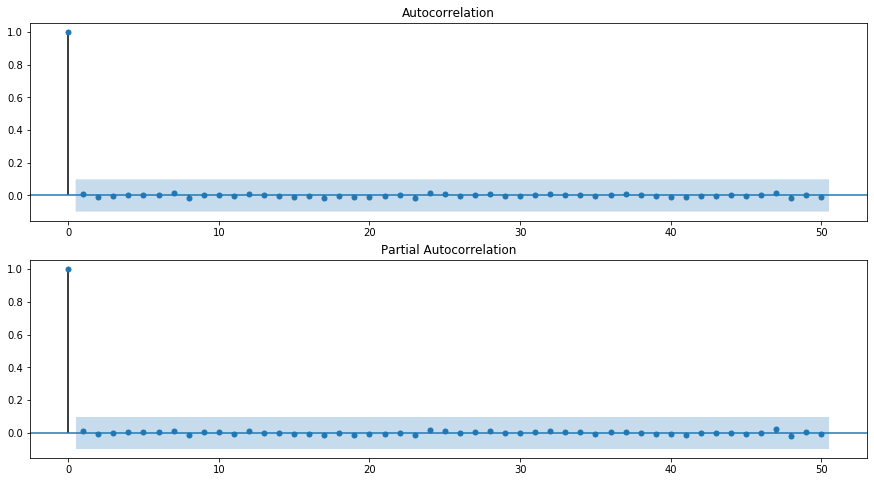

In [112]:
res = arimax.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = plot_acf(res, lags=50, ax=ax[0])
fig = plot_pacf(res, lags=50, ax=ax[1])
plt.show()

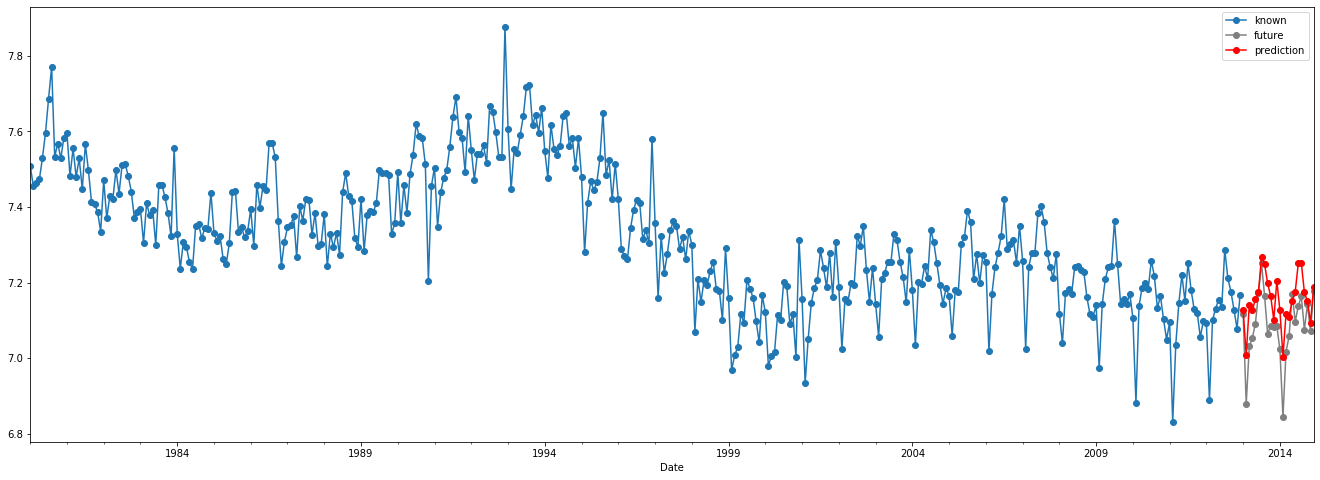

In [113]:
fig, ax = plt.subplots()
data['Num Cases'].plot(ax=ax, xticks=data.index[::12], marker='o', figsize=(23, 8), use_index=True, grid=True)
target['Num Cases'].plot(ax=ax, figsize=(23, 8), marker='o', c='grey', use_index=True, grid=True)
predictions_data = arimax.predict(start=data.index[-1], end=target.index[-1], exog = exog_test)[1:]
predictions_data.plot(ax=ax, color='red', marker='o')

ax.legend(['known', 'future', 'prediction'])

plt.show()

In [114]:
print('ARIMAX RMSE:{}'.format(np.sqrt(mean_squared_error(target['Num Cases'], predictions_data))))

ARIMAX RMSE:0.08430429015393162


In [115]:
n = 10
fit_times = []
for i in range(n):
    t1 = time.time()
    model = SARIMAX(data['Num Cases'], order=(1,1,12), seasonal_order=(0,0,0,0),exog = exog_train).fit()
    t2 = time.time()
    fit_times.append(t2 - t1)
print(f'SARIMA fitting time {np.mean(fit_times)}s')

/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA fitting time 5.889937162399292s


In [117]:
n = 10
pred_times = []
for i in range(n):
    t1 = time.time()
    predictions_data = arimax.predict(start=data.index[-1], end=target.index[-1], exog = exog_test)[1:]  
    t2 = time.time()
    pred_times.append(t2 - t1)
print(f'SARIMA prediction time {np.mean(pred_times)}s')

SARIMA prediction time 0.019176888465881347s


### Measure RMSE for original time series

In [119]:
arimax = SARIMAX(data['Num Cases orig'].astype(float), order=(1,1,12), seasonal_order=(0,0,0,0), exog = exog_train).fit()
predictions_data = arimax.predict(start=data.index[-1], end=target.index[-1], exog = exog_test)[1:]
print('ARIMAX RMSE:{}'.format(np.sqrt(mean_squared_error(target['Num Cases orig'], predictions_data))))

/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMAX RMSE:92.80928542659179


/Users/bobrg/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
